# Visual Data Exploration with Matplotlib

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [18]:
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [19]:
data = np.vstack([data1, data2, data3, data4]).transpose()
data

array([[-0.05352062,  1.20394264,  2.33444324,  2.90403005],
       [ 0.07123586,  0.54963334,  2.62763669,  3.4399326 ],
       [-0.08251633,  0.62167309,  2.30709231,  3.02621594],
       ..., 
       [-0.02270685,  2.41812651,  6.25440143,  3.2398365 ],
       [ 0.08429855,  2.49946362,  6.9138342 ,  3.38244597],
       [ 0.03446527,  2.06522238,  5.41645928,  3.09960747]])

In [20]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()


,data1,data2,data3,data4
0,-0.053521,1.203943,2.334443,2.904030
1,0.071236,0.549633,2.627637,3.439933
2,-0.082516,0.621673,2.307092,3.026216
3,-0.002123,1.115124,2.577762,3.311566
4,-0.106768,0.804708,2.872076,3.141251


# Line Plot


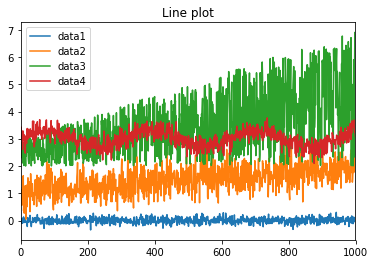

In [21]:
df.plot(title='Line plot')

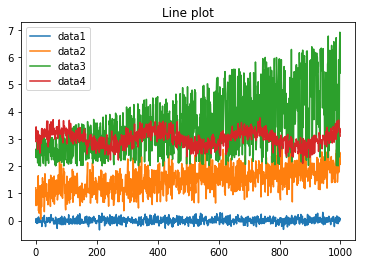

In [22]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4'])

# Scatter plt

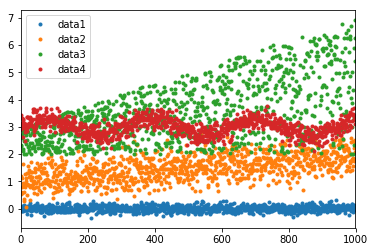

In [25]:
df.plot(style='.')

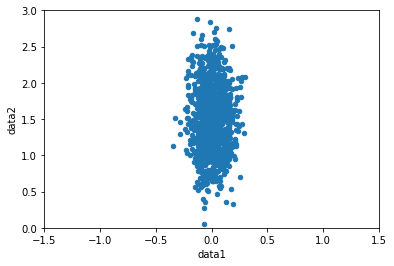

In [26]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

# histogram


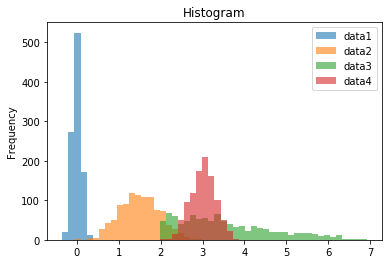

In [27]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6)

# Cumulative distribution

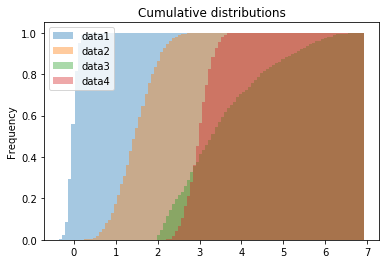

In [28]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        normed=True,
        cumulative=True,
        alpha=0.4)

# Box Plot

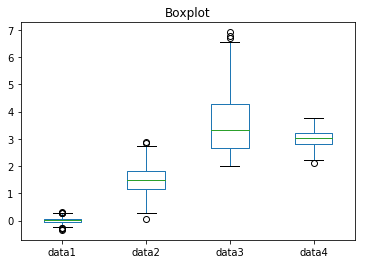

In [29]:
df.plot(kind='box',
        title='Boxplot')

# Subplots

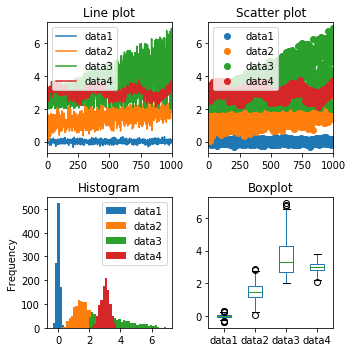

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot')

plt.tight_layout()

# Pie charts

In [31]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

False    838
True     162
Name: data1, dtype: int64

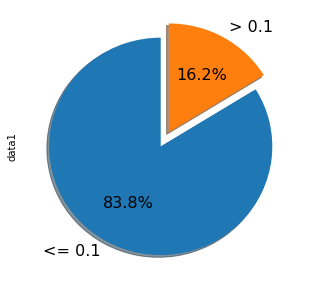

In [32]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16)

# Hexbin plot

In [34]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])
df.head()

,x,y
0,-0.160027,-1.495283
1,-0.801807,-0.956932
2,3.865186,-0.817913
3,-0.271770,-0.975400
4,2.601451,-1.651760


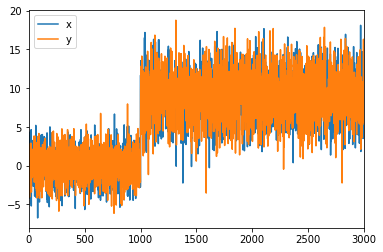

In [35]:
df.plot()

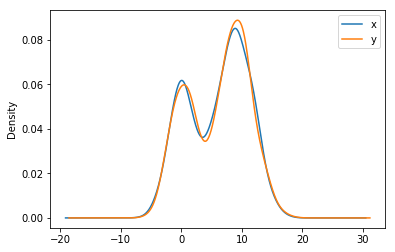

In [36]:
df.plot(kind='kde')

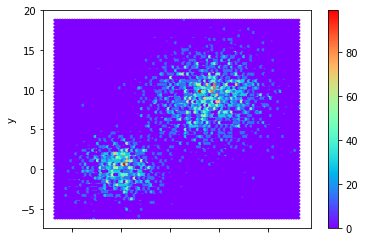

In [37]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow')

# Unstructured data

In [38]:
from PIL import Image

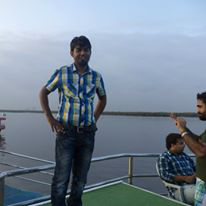

In [40]:
img = Image.open('../data/nasir.jpg')
img

In [41]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [42]:
imgarray = np.asarray(img)

In [43]:
type(imgarray)

numpy.ndarray

In [44]:
imgarray.shape

(206, 206, 3)

In [45]:
imgarray.ravel().shape

(127308,)

In [46]:
206*206* 3

127308

# Sound

In [47]:
from scipy.io import wavfile

In [53]:
rate, snd = wavfile.read(filename='../data/sms.wav')

In [49]:
from IPython.display import Audio

In [50]:
Audio(data=snd, rate=rate)

In [54]:
len(snd)

110250

In [55]:
snd

array([70, 14, 27, ..., 58, 68, 59], dtype=int16)

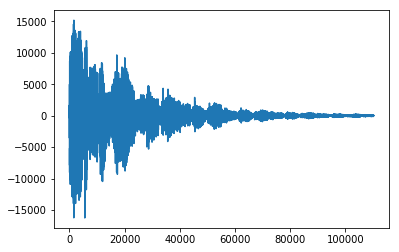

In [56]:
plt.plot(snd)

Text(0.5,0,'Time (s)')

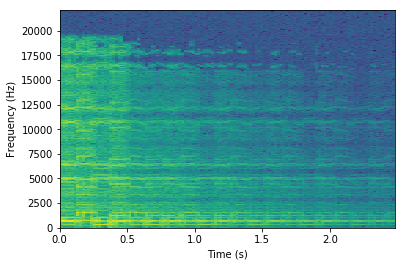

In [57]:
_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')